In [214]:
import sys
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import os
import gc
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

In [215]:
sp_data_folder = '/home/ray/default/omics/mouse_brain_visium_wo_cloupe_data/rawdata/ST8059048'

In [216]:
adata = sc.read_visium(sp_data_folder, count_file='filtered_feature_bc_matrix.h5', load_images=True)

adata.var_names_make_unique()

adata

/home/ray/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/ray/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 2987 × 31053
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [217]:
adata.obs.head()

in_tissue  array_row  array_col
AAACAAGTATCTCCCA-1          1         50        102
AAACACCAATAACTGC-1          1         59         19
AAACAGAGCGACTCCT-1          1         14         94
AAACAGCTTTCAGAAG-1          1         43          9
AAACAGGGTCTATATT-1          1         47         13

In [218]:
adata.var.head()

gene_ids    feature_types              genome
Xkr4     ENSMUSG00000051951  Gene Expression  mm10-3.0.0_premrna
Gm1992   ENSMUSG00000089699  Gene Expression  mm10-3.0.0_premrna
Gm37381  ENSMUSG00000102343  Gene Expression  mm10-3.0.0_premrna
Rp1      ENSMUSG00000025900  Gene Expression  mm10-3.0.0_premrna
Sox17    ENSMUSG00000025902  Gene Expression  mm10-3.0.0_premrna

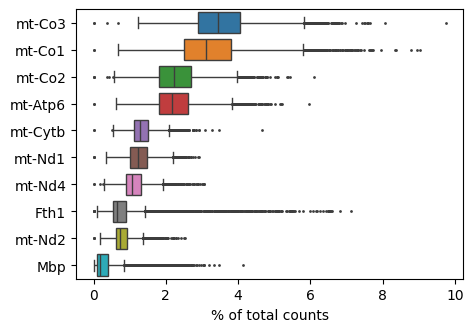

In [219]:
sc.pl.highest_expr_genes(adata, n_top=10)

In [220]:
## convert the sparse matrix to dense matrix

dense_matrix = adata.X.toarray()

## print the dense matrix

print(dense_matrix)

[[2. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Print all genes with non zero expression is a given cell

In [221]:
cell_index=50 # index of the cell we want to examine

## access the expression data for the specific cell

gene_expression = adata.X[cell_index]

##  get the indices of the genes with non-zero expression in the cell

expressed_genes_indices = gene_expression.nonzero()[1]

## access the genes name from the var_names attribute

expressed_genes=adata.var_names[expressed_genes_indices]

##print the list of expressed geness in the cell

print(expressed_genes)


Index(['AC149090.1', 'mt-Cytb', 'mt-Nd6', 'mt-Nd5', 'mt-Nd4', 'mt-Nd4l',
       'mt-Nd3', 'mt-Co3', 'mt-Atp6', 'mt-Atp8',
       ...
       'Rpl7', 'Eya1', 'Ncoa2', 'A830018L16Rik', 'Prex2', 'Arfgef1', 'Cops5',
       '3110035E14Rik', 'Rb1cc1', 'Atp6v1h'],
      dtype='object', length=5805)


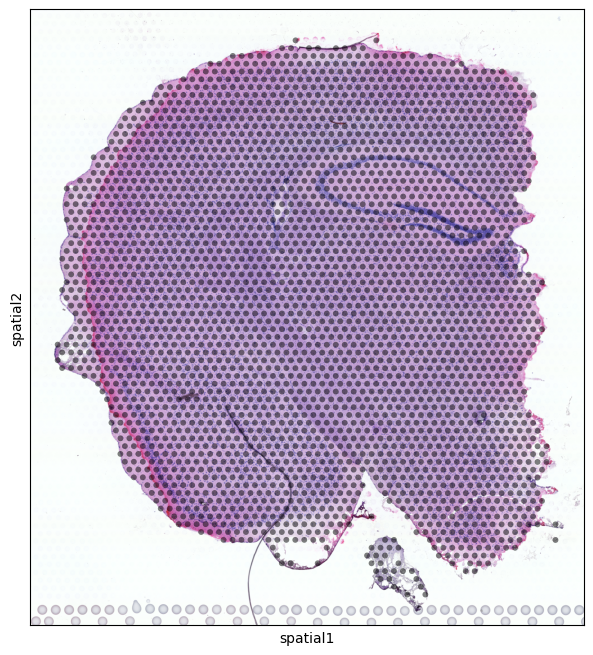

In [222]:
sc.pl.spatial(adata, img_key='hires', alpha=0.5)  

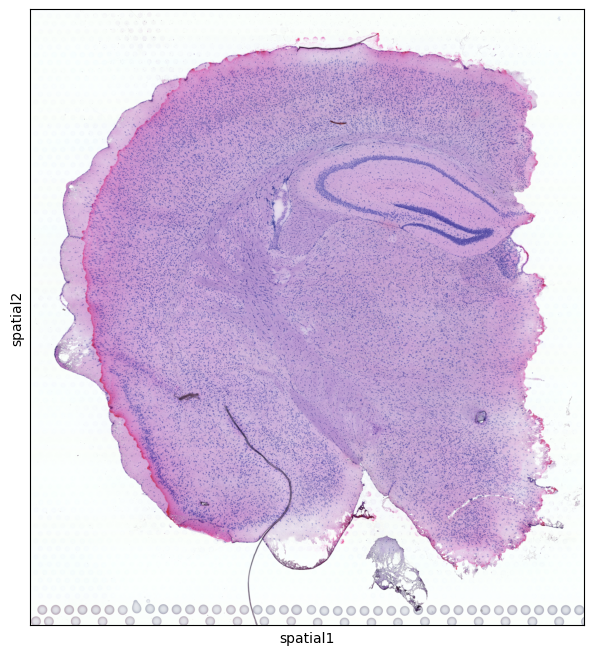

In [223]:
## image with no overlay

sc.pl.spatial(adata, img_key='hires',color=None) 


## Generate a spatial plot of cells using gene expression  levels of the most abundant gene (mt-CO3) and other genese, 'Rorb and 'Vip' 

## first lets verify if it is present

In [224]:
gene_names =adata.var.index

gene_names

Index(['Xkr4', 'Gm1992', 'Gm37381', 'Rp1', 'Sox17', 'Gm37323', 'Mrpl15',
       'Lypla1', 'Gm37988', 'Tcea1',
       ...
       'AC125149.1', 'AC125149.2', 'AC125149.4', 'AC234645.1', 'AC168977.2',
       'AC168977.1', 'AC149090.1', 'CAAA01118383.1', 'Vmn2r122',
       'CAAA01147332.1'],
      dtype='object', length=31053)

## Lets check if the required gene is available

In [225]:
print('is Rorb gene presnt in the vars?', 'Rorb' in gene_names)

print('is Vip gene presnt in the vars?', 'Vip' in gene_names)

is Rorb gene presnt in the vars? True
is Vip gene presnt in the vars? True


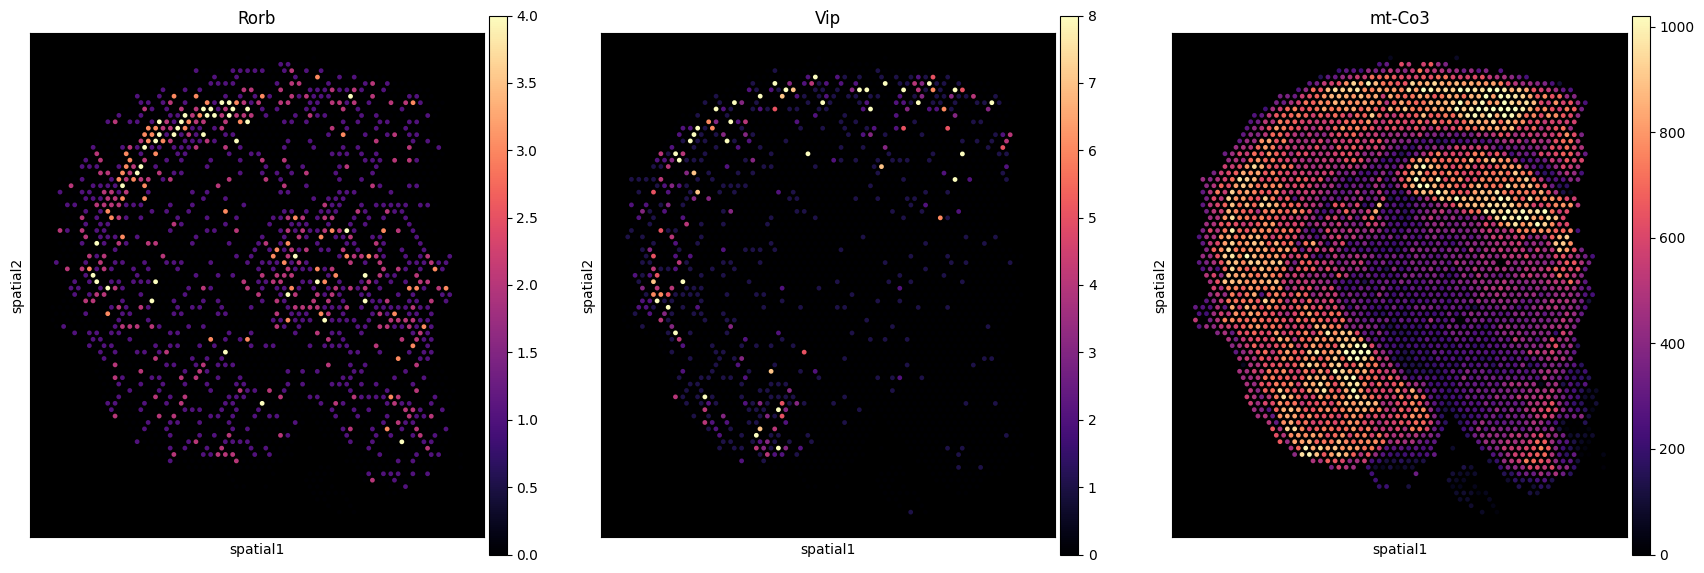

In [226]:
# Verify that the remaining genes are present in the dataset
genes_of_interest = ['Rorb', 'Vip', 'mt-Co3']
missing_genes = [gene for gene in genes_of_interest if gene not in adata.var.index]

if missing_genes:
    print("The following genes are missing:", missing_genes)
else:
    
    with plt.rc_context({'figure.figsize':[6,7], 'axes.facecolor': 'black'}):
        sc.pl.spatial(adata, color=genes_of_interest, img_key=None, size=1,
                      vmin=0, cmap='magma', vmax='p99.0',
                      save='spatial_plot.pdf')

## Prepare data for analysis

In [227]:
sc.pp.calculate_qc_metrics(adata, inplace=True)

In [228]:
# But befor we proceed with qc metric, we like to consider any special gene which we find interseting

adata.var[adata.var.index.str.startswith('mt-')]




gene_ids    feature_types              genome  \
mt-Nd1   ENSMUSG00000064341  Gene Expression  mm10-3.0.0_premrna   
mt-Nd2   ENSMUSG00000064345  Gene Expression  mm10-3.0.0_premrna   
mt-Co1   ENSMUSG00000064351  Gene Expression  mm10-3.0.0_premrna   
mt-Co2   ENSMUSG00000064354  Gene Expression  mm10-3.0.0_premrna   
mt-Atp8  ENSMUSG00000064356  Gene Expression  mm10-3.0.0_premrna   
mt-Atp6  ENSMUSG00000064357  Gene Expression  mm10-3.0.0_premrna   
mt-Co3   ENSMUSG00000064358  Gene Expression  mm10-3.0.0_premrna   
mt-Nd3   ENSMUSG00000064360  Gene Expression  mm10-3.0.0_premrna   
mt-Nd4l  ENSMUSG00000065947  Gene Expression  mm10-3.0.0_premrna   
mt-Nd4   ENSMUSG00000064363  Gene Expression  mm10-3.0.0_premrna   
mt-Nd5   ENSMUSG00000064367  Gene Expression  mm10-3.0.0_premrna   
mt-Nd6   ENSMUSG00000064368  Gene Expression  mm10-3.0.0_premrna   
mt-Cytb  ENSMUSG00000064370  Gene Expression  mm10-3.0.0_premrna   

         n_cells_by_counts  mean_counts  log1p_mean_counts  \
mt-Nd1                2984   182.983261           5.214845   
mt-Nd2                2984   112.724808           4.733782   
mt-Co1                2985   474.385345           6.164126   
mt-Co2                2984   332.904572           5.810855   
mt-Atp8               2839     4.466689           1.698673   
mt-Atp6               2985   327.642120           5.794970   
mt-Co3                2985   519.730835           6.255233   
mt-Nd3                2984    52.348511           3.976846   
mt-Nd4l               2940     6.534316           2.019468   
mt-Nd4                2985   164.248749           5.107452   
mt-Nd5                2977    21.628725           3.119220   
mt-Nd6                 768     0.318714           0.276657   
mt-Cytb               2985   197.986267           5.293236   

         pct_dropout_by_counts  total_counts  log1p_total_counts  
mt-Nd1                0.100435      546571.0           13.211421  
mt-Nd2                0.100435      336709.0           12.726977  
mt-Co1                0.066957     1416989.0           14.164045  
mt-Co2                0.100435      994386.0           13.809882  
mt-Atp8               4.954804       13342.0            9.498747  
mt-Atp6               0.066957      978667.0           13.793948  
mt-Co3                0.066957     1552436.0           14.255337  
mt-Nd3                0.100435      156365.0           11.959954  
mt-Nd4l               1.573485       19518.0            9.879144  
mt-Nd4                0.066957      490611.0           13.103409  
mt-Nd5                0.334784       64605.0           11.076062  
mt-Nd6               74.288584         952.0            6.859615  
mt-Cytb               0.066957      591385.0           13.290224

In [229]:
print(len(adata.var[adata.var.index.str.startswith('mt-')]))

13


In [230]:
## Tag all genese as True or False to be mitochondrial

adata.var['mt'] = adata.var_names.str.startswith('mt-')

adata.var

gene_ids    feature_types              genome  \
Xkr4            ENSMUSG00000051951  Gene Expression  mm10-3.0.0_premrna   
Gm1992          ENSMUSG00000089699  Gene Expression  mm10-3.0.0_premrna   
Gm37381         ENSMUSG00000102343  Gene Expression  mm10-3.0.0_premrna   
Rp1             ENSMUSG00000025900  Gene Expression  mm10-3.0.0_premrna   
Sox17           ENSMUSG00000025902  Gene Expression  mm10-3.0.0_premrna   
...                            ...              ...                 ...   
AC168977.1      ENSMUSG00000079808  Gene Expression  mm10-3.0.0_premrna   
AC149090.1      ENSMUSG00000095041  Gene Expression  mm10-3.0.0_premrna   
CAAA01118383.1  ENSMUSG00000063897  Gene Expression  mm10-3.0.0_premrna   
Vmn2r122        ENSMUSG00000096730  Gene Expression  mm10-3.0.0_premrna   
CAAA01147332.1  ENSMUSG00000095742  Gene Expression  mm10-3.0.0_premrna   

                n_cells_by_counts  mean_counts  log1p_mean_counts  \
Xkr4                          672     0.275527           0.243360   
Gm1992                          2     0.000670           0.000669   
Gm37381                         0     0.000000           0.000000   
Rp1                             8     0.002678           0.002675   
Sox17                         126     0.044191           0.043243   
...                           ...          ...                ...   
AC168977.1                      0     0.000000           0.000000   
AC149090.1                   1524     0.933713           0.659442   
CAAA01118383.1                567     0.222631           0.201005   
Vmn2r122                        0     0.000000           0.000000   
CAAA01147332.1                  2     0.000670           0.000669   

                pct_dropout_by_counts  total_counts  log1p_total_counts     mt  
Xkr4                        77.502511         823.0            6.714170  False  
Gm1992                      99.933043           2.0            1.098612  False  
Gm37381                    100.000000           0.0            0.000000  False  
Rp1                         99.732173           8.0            2.197225  False  
Sox17                       95.781721         132.0            4.890349  False  
...                               ...           ...                 ...    ...  
AC168977.1                 100.000000           0.0            0.000000  False  
AC149090.1                  48.978909        2789.0            7.933797  False  
CAAA01118383.1              81.017744         665.0            6.501290  False  
Vmn2r122                   100.000000           0.0            0.000000  False  
CAAA01147332.1              99.933043           2.0            1.098612  False  

[31053 rows x 10 columns]

In [231]:
adata.obs

in_tissue  array_row  array_col  n_genes_by_counts  \
AAACAAGTATCTCCCA-1          1         50        102               4678   
AAACACCAATAACTGC-1          1         59         19               3549   
AAACAGAGCGACTCCT-1          1         14         94               6779   
AAACAGCTTTCAGAAG-1          1         43          9               3108   
AAACAGGGTCTATATT-1          1         47         13               4515   
...                       ...        ...        ...                ...   
TTGTTCAGTGTGCTAC-1          1         24         64               8457   
TTGTTGTGTGTCAAGA-1          1         31         77               3464   
TTGTTTCACATCCAGG-1          1         58         42               5457   
TTGTTTCATTAGTCTA-1          1         60         30               5300   
TTGTTTCCATACAACT-1          1         45         27               5143   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACAAGTATCTCCCA-1                 8.450840       14284.0            9.566965   
AAACACCAATAACTGC-1                 8.174703        9951.0            9.205529   
AAACAGAGCGACTCCT-1                 8.821732       32155.0           10.378354   
AAACAGCTTTCAGAAG-1                 8.042056        7935.0            8.979165   
AAACAGGGTCTATATT-1                 8.415382       14483.0            9.580800   
...                                     ...           ...                 ...   
TTGTTCAGTGTGCTAC-1                 9.042868       65866.0           11.095393   
TTGTTGTGTGTCAAGA-1                 8.150468        8785.0            9.080914   
TTGTTTCACATCCAGG-1                 8.604838       19956.0            9.901336   
TTGTTTCATTAGTCTA-1                 8.575651       18351.0            9.817493   
TTGTTTCCATACAACT-1                 8.545586       17529.0            9.771669   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACAAGTATCTCCCA-1                   27.457295                    32.812938   
AAACACCAATAACTGC-1                   37.061602                    42.337454   
AAACAGAGCGACTCCT-1                   23.784792                    29.830508   
AAACAGCTTTCAGAAG-1                   32.917454                    39.054820   
AAACAGGGTCTATATT-1                   30.994960                    36.415107   
...                                        ...                          ...   
TTGTTCAGTGTGCTAC-1                   17.673762                    24.381320   
TTGTTGTGTGTCAAGA-1                   27.137166                    33.249858   
TTGTTTCACATCCAGG-1                   23.872520                    29.695330   
TTGTTTCATTAGTCTA-1                   24.892376                    30.477903   
TTGTTTCCATACAACT-1                   25.415027                    31.330937   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  
AAACAAGTATCTCCCA-1                    39.897788                    52.856343  
AAACACCAATAACTGC-1                    49.110642                    60.586876  
AAACAGAGCGACTCCT-1                    37.860364                    51.397916  
AAACAGCTTTCAGAAG-1                    46.389414                    59.206049  
AAACAGGGTCTATATT-1                    43.506180                    56.031209  
...                                         ...                          ...  
TTGTTCAGTGTGCTAC-1                    33.152157                    48.190265  
TTGTTGTGTGTCAAGA-1                    41.343199                    55.310188  
TTGTTTCACATCCAGG-1                    37.748046                    51.638605  
TTGTTTCATTAGTCTA-1                    38.194104                    51.670209  
TTGTTTCCATACAACT-1                    39.505962                    53.191853  

[2987 rows x 11 columns]

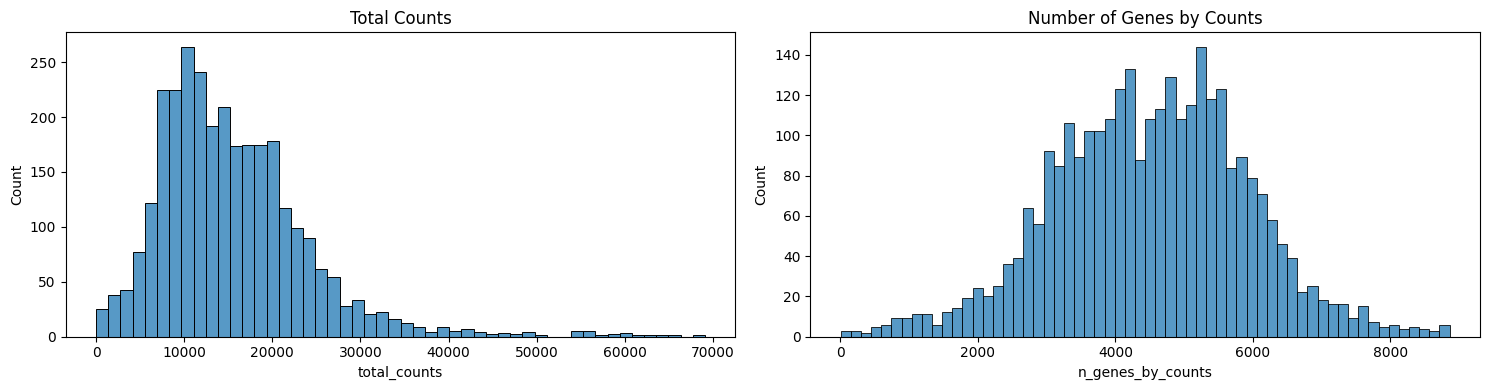

In [232]:
## lets plot a histogram of the total counts column from adata.obs dataframe
## plot a histogram of the n_genes_by_counts column

fig, axs = plt.subplots(1, 2, figsize=(15, 4))


sns.histplot(adata.obs['total_counts'], kde=False, ax=axs[0])
axs[0].set_title('Total Counts')


sns.histplot(adata.obs['n_genes_by_counts'], kde=False, bins=60, ax=axs[1])
axs[1].set_title('Number of Genes by Counts')

plt.tight_layout()
plt.show()

In [233]:
## lets sort th data

adata.obs.sort_values('total_counts')

in_tissue  array_row  array_col  n_genes_by_counts  \
CACAGTCCCGCTTCGC-1          1         60        112                  3   
AGCGATGCGCCTAATA-1          1         64        108                 38   
AGATACCAATAGAACC-1          1         64        110                 66   
GGAGTTGATTCTGTGT-1          1         68        112                179   
AGAAGAGCGCCGTTCC-1          1         38         88                238   
...                       ...        ...        ...                ...   
CTGACTGCGCAGCTCG-1          1         31        101               8821   
TGGCCAAACTGAAGTA-1          1         28         76               8444   
CTAACGAAACTTGCTG-1          1         30         94               8861   
TTGTTCAGTGTGCTAC-1          1         24         64               8457   
CATGGTCTAGATACCG-1          1         26         66               8574   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
CACAGTCCCGCTTCGC-1                 1.386294           3.0            1.386294   
AGCGATGCGCCTAATA-1                 3.663562          43.0            3.784190   
AGATACCAATAGAACC-1                 4.204693          73.0            4.304065   
GGAGTTGATTCTGTGT-1                 5.192957         226.0            5.424950   
AGAAGAGCGCCGTTCC-1                 5.476464         295.0            5.690360   
...                                     ...           ...                 ...   
CTGACTGCGCAGCTCG-1                 9.085004       61512.0           11.027004   
TGGCCAAACTGAAGTA-1                 9.041330       62504.0           11.043002   
CTAACGAAACTTGCTG-1                 9.089528       63739.0           11.062568   
TTGTTCAGTGTGCTAC-1                 9.042868       65866.0           11.095393   
CATGGTCTAGATACCG-1                 9.056606       69102.0           11.143353   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
CACAGTCCCGCTTCGC-1                  100.000000                   100.000000   
AGCGATGCGCCTAATA-1                  100.000000                   100.000000   
AGATACCAATAGAACC-1                   78.082192                   100.000000   
GGAGTTGATTCTGTGT-1                   42.920354                    65.044248   
AGAAGAGCGCCGTTCC-1                   36.271186                    53.220339   
...                                        ...                          ...   
CTGACTGCGCAGCTCG-1                   17.407985                    23.345038   
TGGCCAAACTGAAGTA-1                   19.035582                    25.241585   
CTAACGAAACTTGCTG-1                   17.661087                    23.684087   
TTGTTCAGTGTGCTAC-1                   17.673762                    24.381320   
CATGGTCTAGATACCG-1                   18.657926                    25.209111   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  
CACAGTCCCGCTTCGC-1                   100.000000                   100.000000  
AGCGATGCGCCTAATA-1                   100.000000                   100.000000  
AGATACCAATAGAACC-1                   100.000000                   100.000000  
GGAGTTGATTCTGTGT-1                   100.000000                   100.000000  
AGAAGAGCGCCGTTCC-1                    87.118644                   100.000000  
...                                         ...                          ...  
CTGACTGCGCAGCTCG-1                    31.385746                    45.608987  
TGGCCAAACTGAAGTA-1                    33.629848                    48.248112  
CTAACGAAACTTGCTG-1                    31.945904                    45.893409  
TTGTTCAGTGTGCTAC-1                    33.152157                    48.190265  
CATGGTCTAGATACCG-1                    33.799311                    48.848080  

[2987 rows x 11 columns]

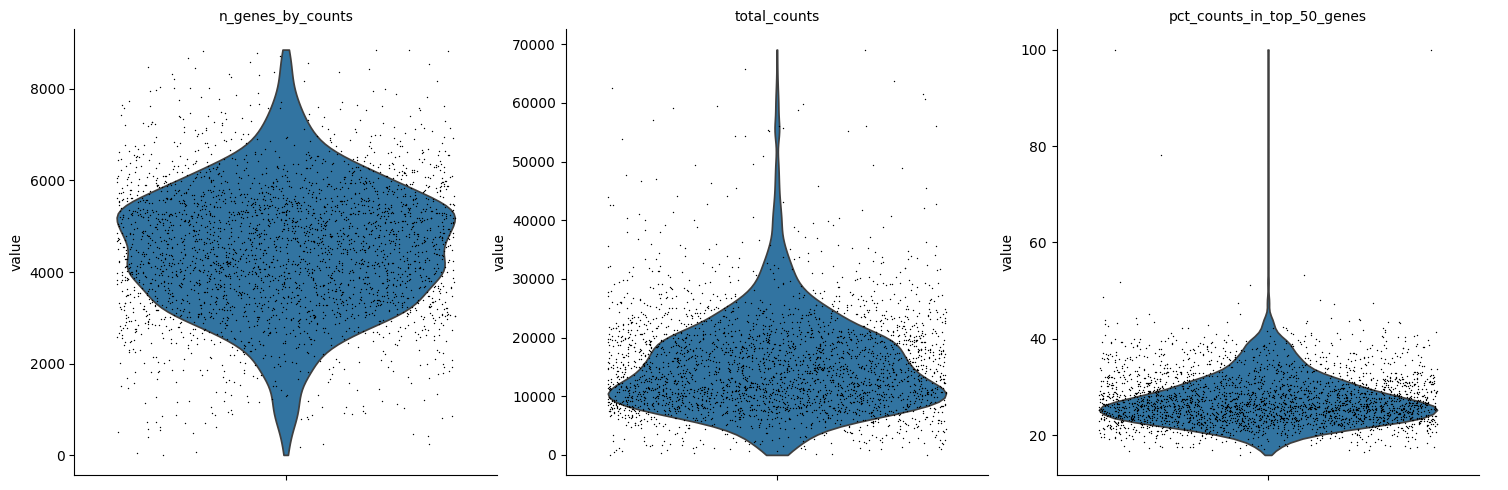

In [234]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts','pct_counts_in_top_50_genes' ], jitter=0.4, multi_panel=True)

## Lets find genes with most count across cells and also find gene with highest sum


In [235]:

gene_counts_sum=np.sum(adata.X,axis=0)

gene_with_most_counts=adata.var_names[np.argmax(gene_counts_sum)]

print('Gene with most counts:', gene_with_most_counts)

Gene with most counts: mt-Co3


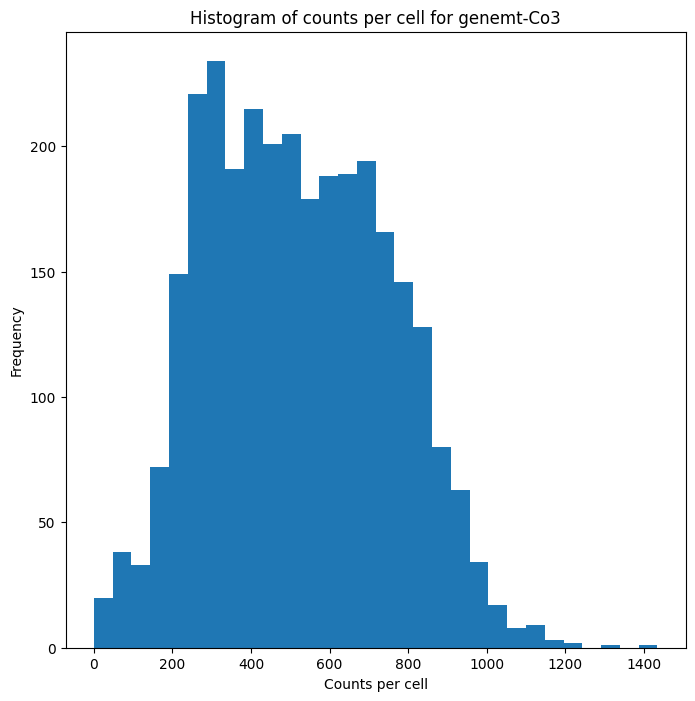

In [236]:
## specify the gene name

gene_name='mt-Co3'

## get the index of the gene in adata.var_names

gene_index = list(adata.var_names).index(gene_name)

# extract the gene expression counts for the gene

gene_counts=adata.X[:,gene_index]

##convert sparse matrix to array

gene_counts_array=gene_counts.toarray().flatten()

## plot the hist 

plt.hist(gene_counts_array, bins=30)
plt.title(f'Histogram of counts per cell for gene{gene_name}')
plt.xlabel('Counts per cell')
plt.ylabel('Frequency')
plt.show()

## Lets normalize the data

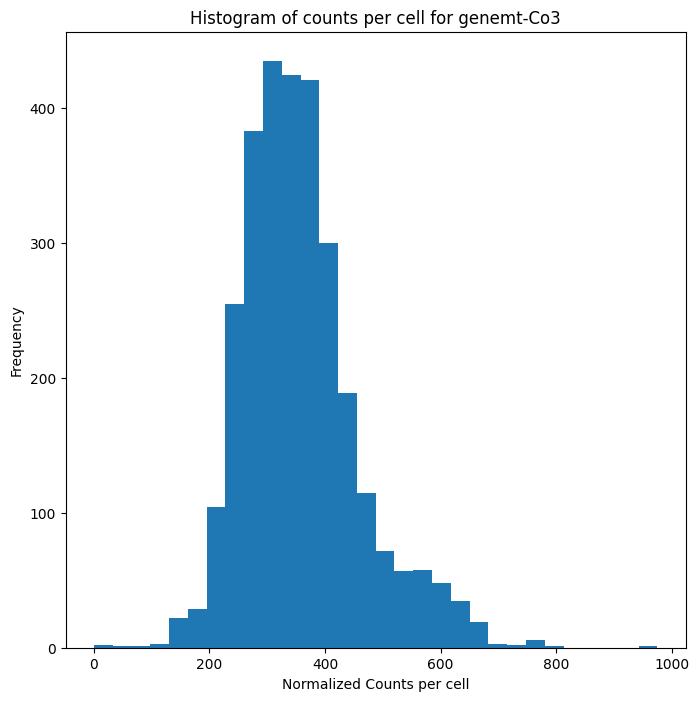

In [237]:
sc.pp.normalize_total(adata, inplace=True, target_sum=1e4)

## lets get the normalized gene expresion counts for the gene

gene_counts_normalized=adata.X[:, gene_index]

##conver sparse matrix to array

gene_counts_normailzed_array=gene_counts_normalized.toarray().flatten()

## plot the hist 

plt.hist(gene_counts_normailzed_array, bins=30)
plt.title(f'Histogram of counts per cell for gene{gene_name}')
plt.xlabel('Normalized Counts per cell')
plt.ylabel('Frequency')
plt.show()

## Lets have a log transformation


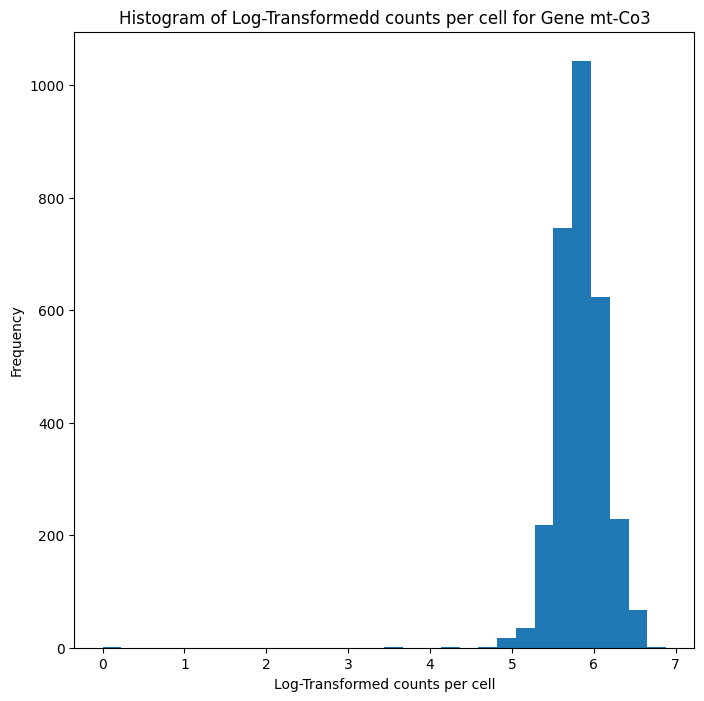

In [238]:
## lets get log transformed gene expression count for the gene

sc.pp.log1p(adata)

gene_counts_log_transformed=adata.X[:, gene_index]

## convert sparse matrix to array

gene_counts_log_transformed_array=gene_counts_log_transformed.toarray().flatten()

## plot the hist 

plt.hist(gene_counts_log_transformed_array, bins=30)
plt.title(f'Histogram of Log-Transformedd counts per cell for Gene {gene_name}')
plt.xlabel('Log-Transformed counts per cell')
plt.ylabel('Frequency')
plt.show()

## Lets identify higl variable genes

In [239]:
sc.pp.highly_variable_genes(adata, flavor='seurat', n_top_genes=2000)

adata.var

gene_ids    feature_types              genome  \
Xkr4            ENSMUSG00000051951  Gene Expression  mm10-3.0.0_premrna   
Gm1992          ENSMUSG00000089699  Gene Expression  mm10-3.0.0_premrna   
Gm37381         ENSMUSG00000102343  Gene Expression  mm10-3.0.0_premrna   
Rp1             ENSMUSG00000025900  Gene Expression  mm10-3.0.0_premrna   
Sox17           ENSMUSG00000025902  Gene Expression  mm10-3.0.0_premrna   
...                            ...              ...                 ...   
AC168977.1      ENSMUSG00000079808  Gene Expression  mm10-3.0.0_premrna   
AC149090.1      ENSMUSG00000095041  Gene Expression  mm10-3.0.0_premrna   
CAAA01118383.1  ENSMUSG00000063897  Gene Expression  mm10-3.0.0_premrna   
Vmn2r122        ENSMUSG00000096730  Gene Expression  mm10-3.0.0_premrna   
CAAA01147332.1  ENSMUSG00000095742  Gene Expression  mm10-3.0.0_premrna   

                n_cells_by_counts  mean_counts  log1p_mean_counts  \
Xkr4                          672     0.275527           0.243360   
Gm1992                          2     0.000670           0.000669   
Gm37381                         0     0.000000           0.000000   
Rp1                             8     0.002678           0.002675   
Sox17                         126     0.044191           0.043243   
...                           ...          ...                ...   
AC168977.1                      0     0.000000           0.000000   
AC149090.1                   1524     0.933713           0.659442   
CAAA01118383.1                567     0.222631           0.201005   
Vmn2r122                        0     0.000000           0.000000   
CAAA01147332.1                  2     0.000670           0.000669   

                pct_dropout_by_counts  total_counts  log1p_total_counts  \
Xkr4                        77.502511         823.0            6.714170   
Gm1992                      99.933043           2.0            1.098612   
Gm37381                    100.000000           0.0            0.000000   
Rp1                         99.732173           8.0            2.197225   
Sox17                       95.781721         132.0            4.890349   
...                               ...           ...                 ...   
AC168977.1                 100.000000           0.0            0.000000   
AC149090.1                  48.978909        2789.0            7.933797   
CAAA01118383.1              81.017744         665.0            6.501290   
Vmn2r122                   100.000000           0.0            0.000000   
CAAA01147332.1              99.933043           2.0            1.098612   

                   mt  highly_variable         means  dispersions  \
Xkr4            False             True  1.922188e-01     1.159800   
Gm1992          False            False  3.939251e-04    -0.455903   
Gm37381         False            False  1.000000e-12          NaN   
Rp1             False            False  1.820816e-03    -0.277073   
Sox17           False             True  3.396674e-02     0.461468   
...               ...              ...           ...          ...   
AC168977.1      False            False  1.000000e-12          NaN   
AC149090.1      False            False  4.321780e-01    -0.147448   
CAAA01118383.1  False            False  1.335710e-01    -0.066308   
Vmn2r122        False            False  1.000000e-12          NaN   
CAAA01147332.1  False            False  3.816176e-04    -0.554588   

                dispersions_norm  
Xkr4                    2.927554  
Gm1992                 -0.824789  
Gm37381                      NaN  
Rp1                    -0.409470  
Sox17                   1.305734  
...                          ...  
AC168977.1                   NaN  
AC149090.1             -0.639368  
CAAA01118383.1          0.080015  
Vmn2r122                     NaN  
CAAA01147332.1         -1.053975  

[31053 rows x 14 columns]

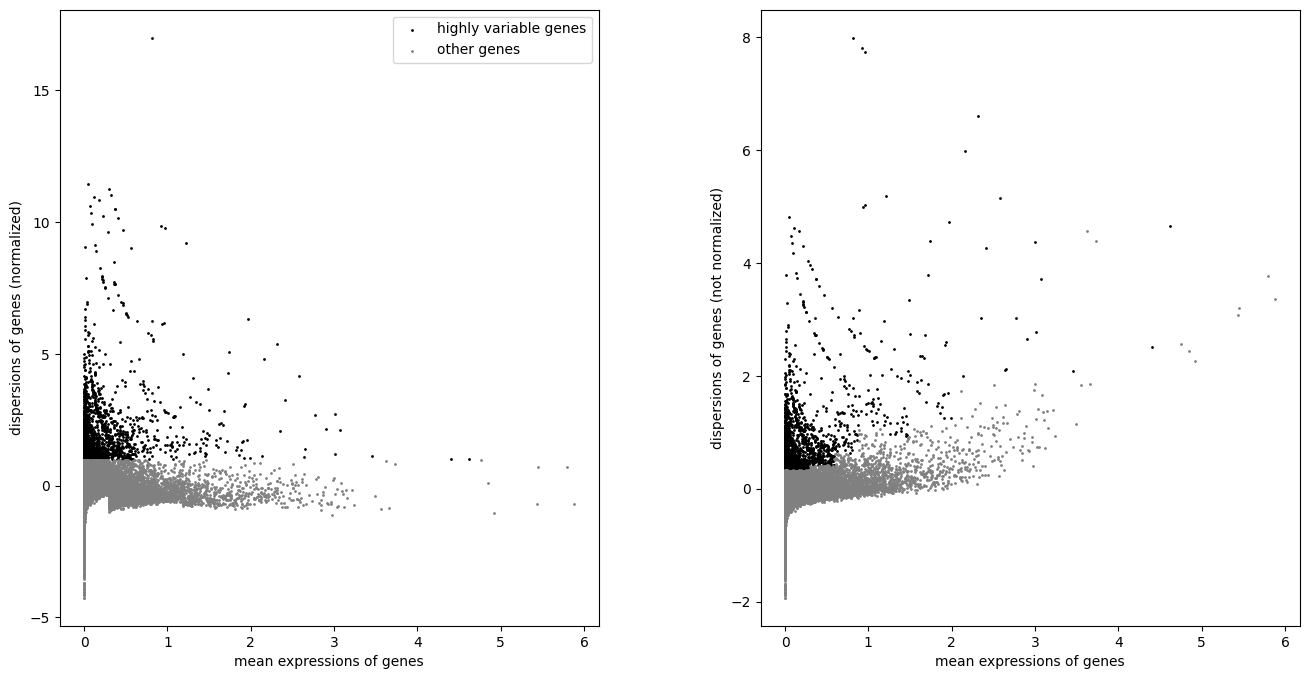

In [240]:
sc.pl.highly_variable_genes(adata)

## Now lets reduce the dimensionality

In [241]:
adata=adata[:, adata.var.highly_variable]

/home/ray/anaconda3/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca


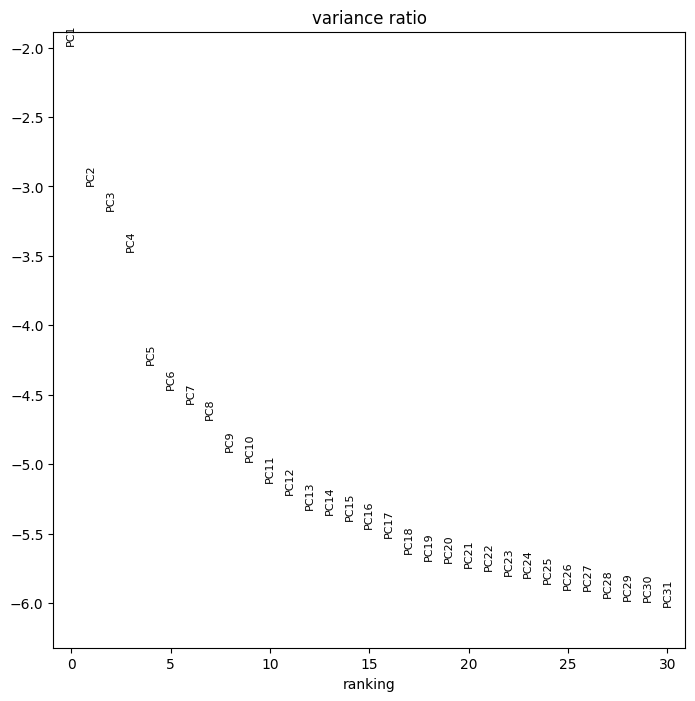

In [242]:
## lets do pricipal component analysis on gene expression data in adata.

sc.pp.pca(adata)    ### by default calculates 30 PCA

sc.pl.pca_variance_ratio(adata, log=True)

In [243]:
### after seeing the above plot, lets use top 20 to calculate the neighbours

sc.pp.neighbors(adata, n_pcs=20)

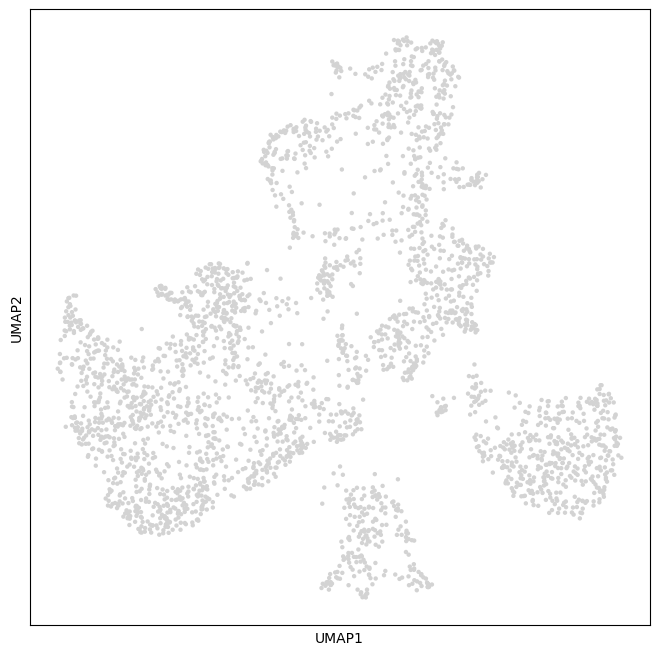

In [244]:
### let us further reduce the dimension to 2

sc.tl.umap(adata, n_components=2)

sc.pl.umap(adata)   ###the data need to be clustered in various clusters

 Lets visualize for few selected gene, and select the ones that showed in large number of cells

In [245]:
sorted_by_num_cells=adata.var['n_cells_by_counts'].sort_values(ascending=False)
sorted_by_num_cells

Gm42418    2985
mt-Nd2     2984
Fth1       2982
Tmsb4x     2977
Malat1     2962
           ... 
Aym1          1
Gm34829       1
Gm33958       1
Gm13497       1
Gm9972        1
Name: n_cells_by_counts, Length: 2000, dtype: int64

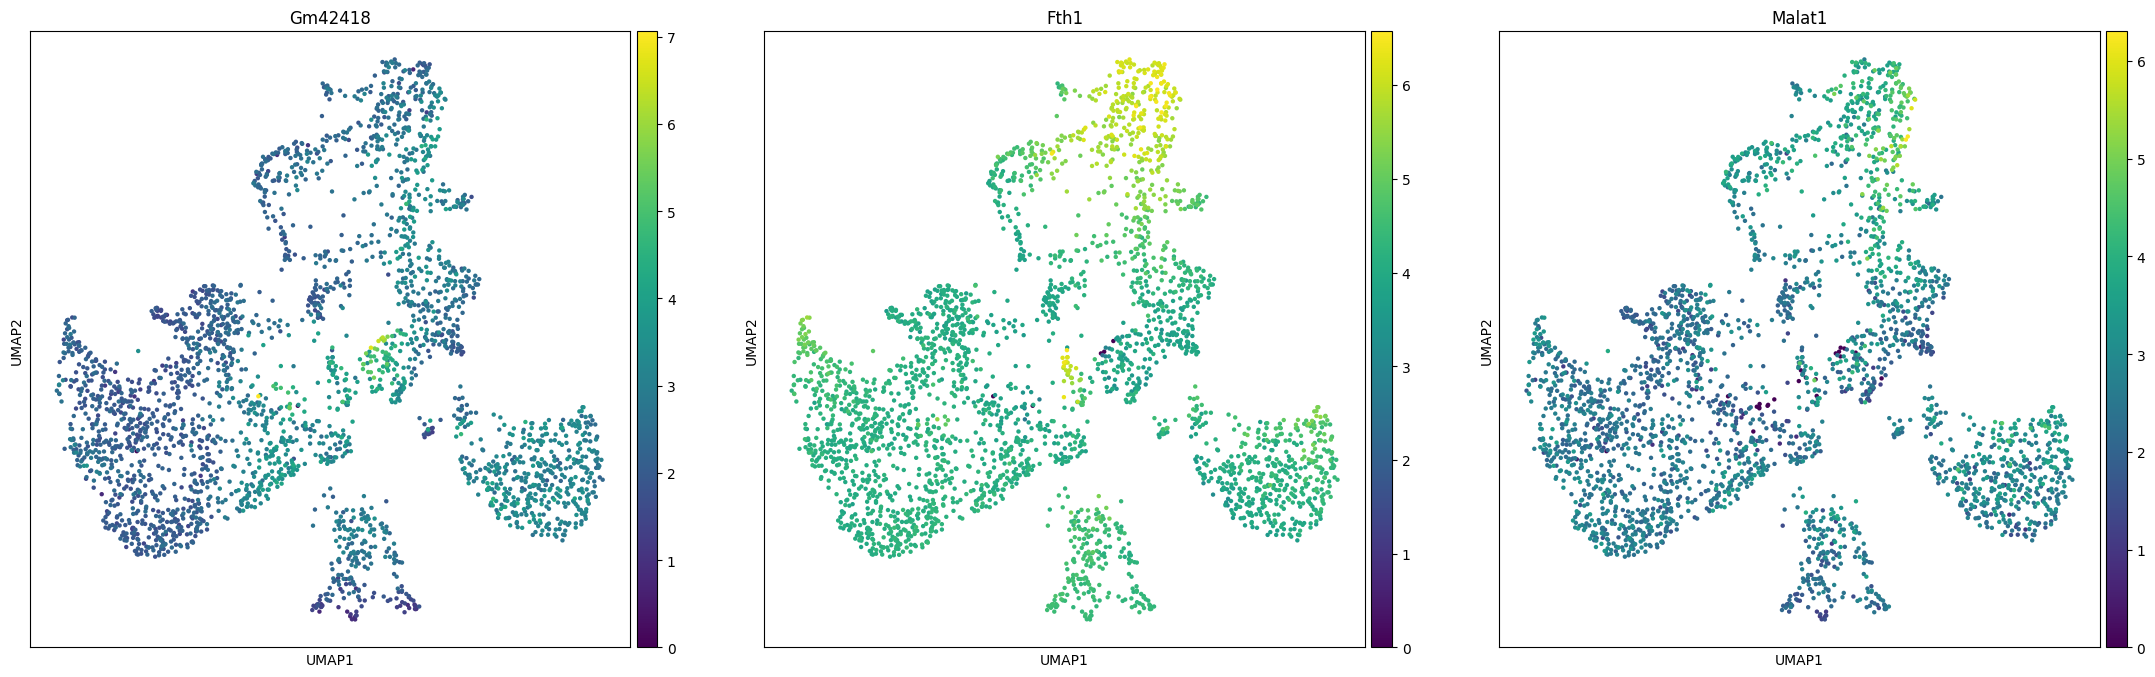

In [246]:
sc.pl.umap(adata, color=['Gm42418', 'Fth1', 'Malat1' ])

In [247]:
sc.tl.leiden(adata, resolution=0.6, key_added='clusters')

In [248]:
adata.obs

in_tissue  array_row  array_col  n_genes_by_counts  \
AAACAAGTATCTCCCA-1          1         50        102               4678   
AAACACCAATAACTGC-1          1         59         19               3549   
AAACAGAGCGACTCCT-1          1         14         94               6779   
AAACAGCTTTCAGAAG-1          1         43          9               3108   
AAACAGGGTCTATATT-1          1         47         13               4515   
...                       ...        ...        ...                ...   
TTGTTCAGTGTGCTAC-1          1         24         64               8457   
TTGTTGTGTGTCAAGA-1          1         31         77               3464   
TTGTTTCACATCCAGG-1          1         58         42               5457   
TTGTTTCATTAGTCTA-1          1         60         30               5300   
TTGTTTCCATACAACT-1          1         45         27               5143   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACAAGTATCTCCCA-1                 8.450840       14284.0            9.566965   
AAACACCAATAACTGC-1                 8.174703        9951.0            9.205529   
AAACAGAGCGACTCCT-1                 8.821732       32155.0           10.378354   
AAACAGCTTTCAGAAG-1                 8.042056        7935.0            8.979165   
AAACAGGGTCTATATT-1                 8.415382       14483.0            9.580800   
...                                     ...           ...                 ...   
TTGTTCAGTGTGCTAC-1                 9.042868       65866.0           11.095393   
TTGTTGTGTGTCAAGA-1                 8.150468        8785.0            9.080914   
TTGTTTCACATCCAGG-1                 8.604838       19956.0            9.901336   
TTGTTTCATTAGTCTA-1                 8.575651       18351.0            9.817493   
TTGTTTCCATACAACT-1                 8.545586       17529.0            9.771669   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACAAGTATCTCCCA-1                   27.457295                    32.812938   
AAACACCAATAACTGC-1                   37.061602                    42.337454   
AAACAGAGCGACTCCT-1                   23.784792                    29.830508   
AAACAGCTTTCAGAAG-1                   32.917454                    39.054820   
AAACAGGGTCTATATT-1                   30.994960                    36.415107   
...                                        ...                          ...   
TTGTTCAGTGTGCTAC-1                   17.673762                    24.381320   
TTGTTGTGTGTCAAGA-1                   27.137166                    33.249858   
TTGTTTCACATCCAGG-1                   23.872520                    29.695330   
TTGTTTCATTAGTCTA-1                   24.892376                    30.477903   
TTGTTTCCATACAACT-1                   25.415027                    31.330937   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AAACAAGTATCTCCCA-1                    39.897788                    52.856343   
AAACACCAATAACTGC-1                    49.110642                    60.586876   
AAACAGAGCGACTCCT-1                    37.860364                    51.397916   
AAACAGCTTTCAGAAG-1                    46.389414                    59.206049   
AAACAGGGTCTATATT-1                    43.506180                    56.031209   
...                                         ...                          ...   
TTGTTCAGTGTGCTAC-1                    33.152157                    48.190265   
TTGTTGTGTGTCAAGA-1                    41.343199                    55.310188   
TTGTTTCACATCCAGG-1                    37.748046                    51.638605   
TTGTTTCATTAGTCTA-1                    38.194104                    51.670209   
TTGTTTCCATACAACT-1                    39.505962                    53.191853   

                   clusters  
AAACAAGTATCTCCCA-1        0  
AAACACCAATAACTGC-1        4  
AAACAGAGCGACTCCT-1        1  
AAACAGCTTTCAGAAG-1        4  
AAACAGGGTCTATATT-1        3  
...                     ...  
TTGTTCAGTGTGCTAC-1        7  
TTGTTGTG

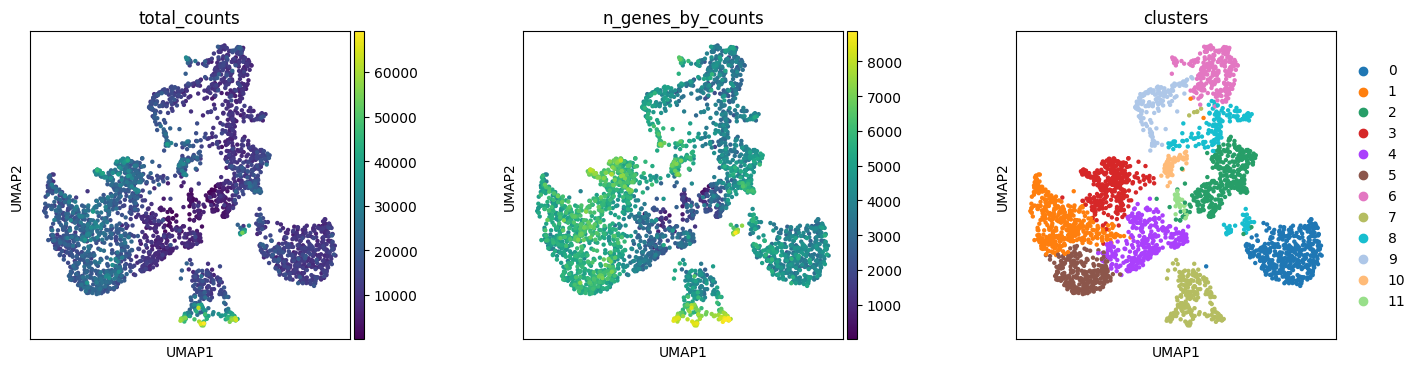

In [249]:
plt.rcParams['figure.figsize']=(4,4)
sc.pl.umap(adata, color=['total_counts', 'n_genes_by_counts', 'clusters'], wspace=0.4)

lets create a spatial plot of cells with color coded annotation for total_counts (total gene counts per cell) and 'n_genes_by_counts

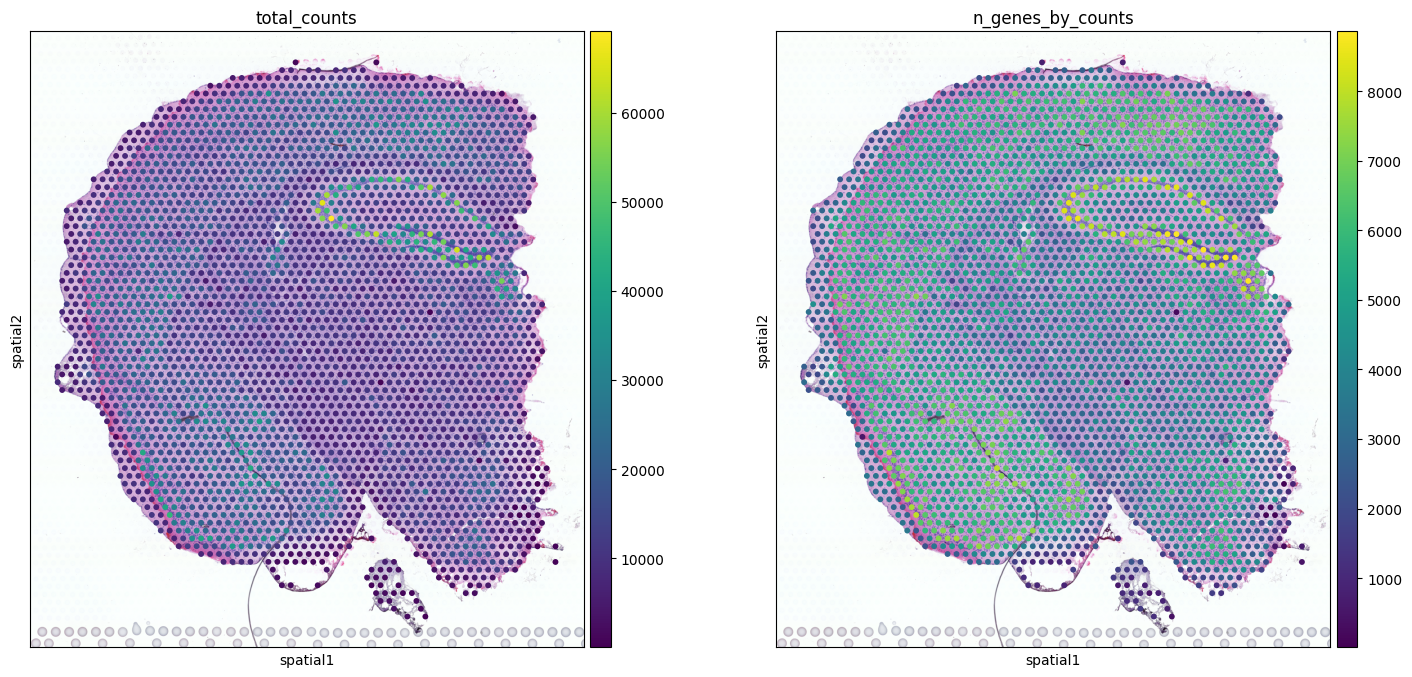

In [250]:
plt.rcParams['figure.figsize']=(8,8)
sc.pl.spatial(adata, img_key='hires', color=['total_counts', 'n_genes_by_counts'])

lets overlap the cluster on spatial graph and see the mapping

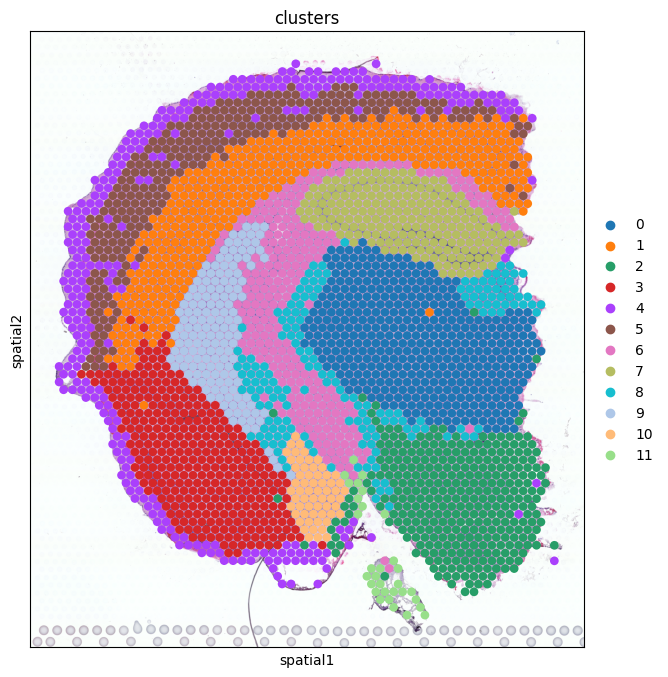

In [251]:
plt.rcParams['figure.figsize']=(8,8)
sc.pl.spatial(adata, img_key='hires', color='clusters', size=1.5)

## Lets find marker genes

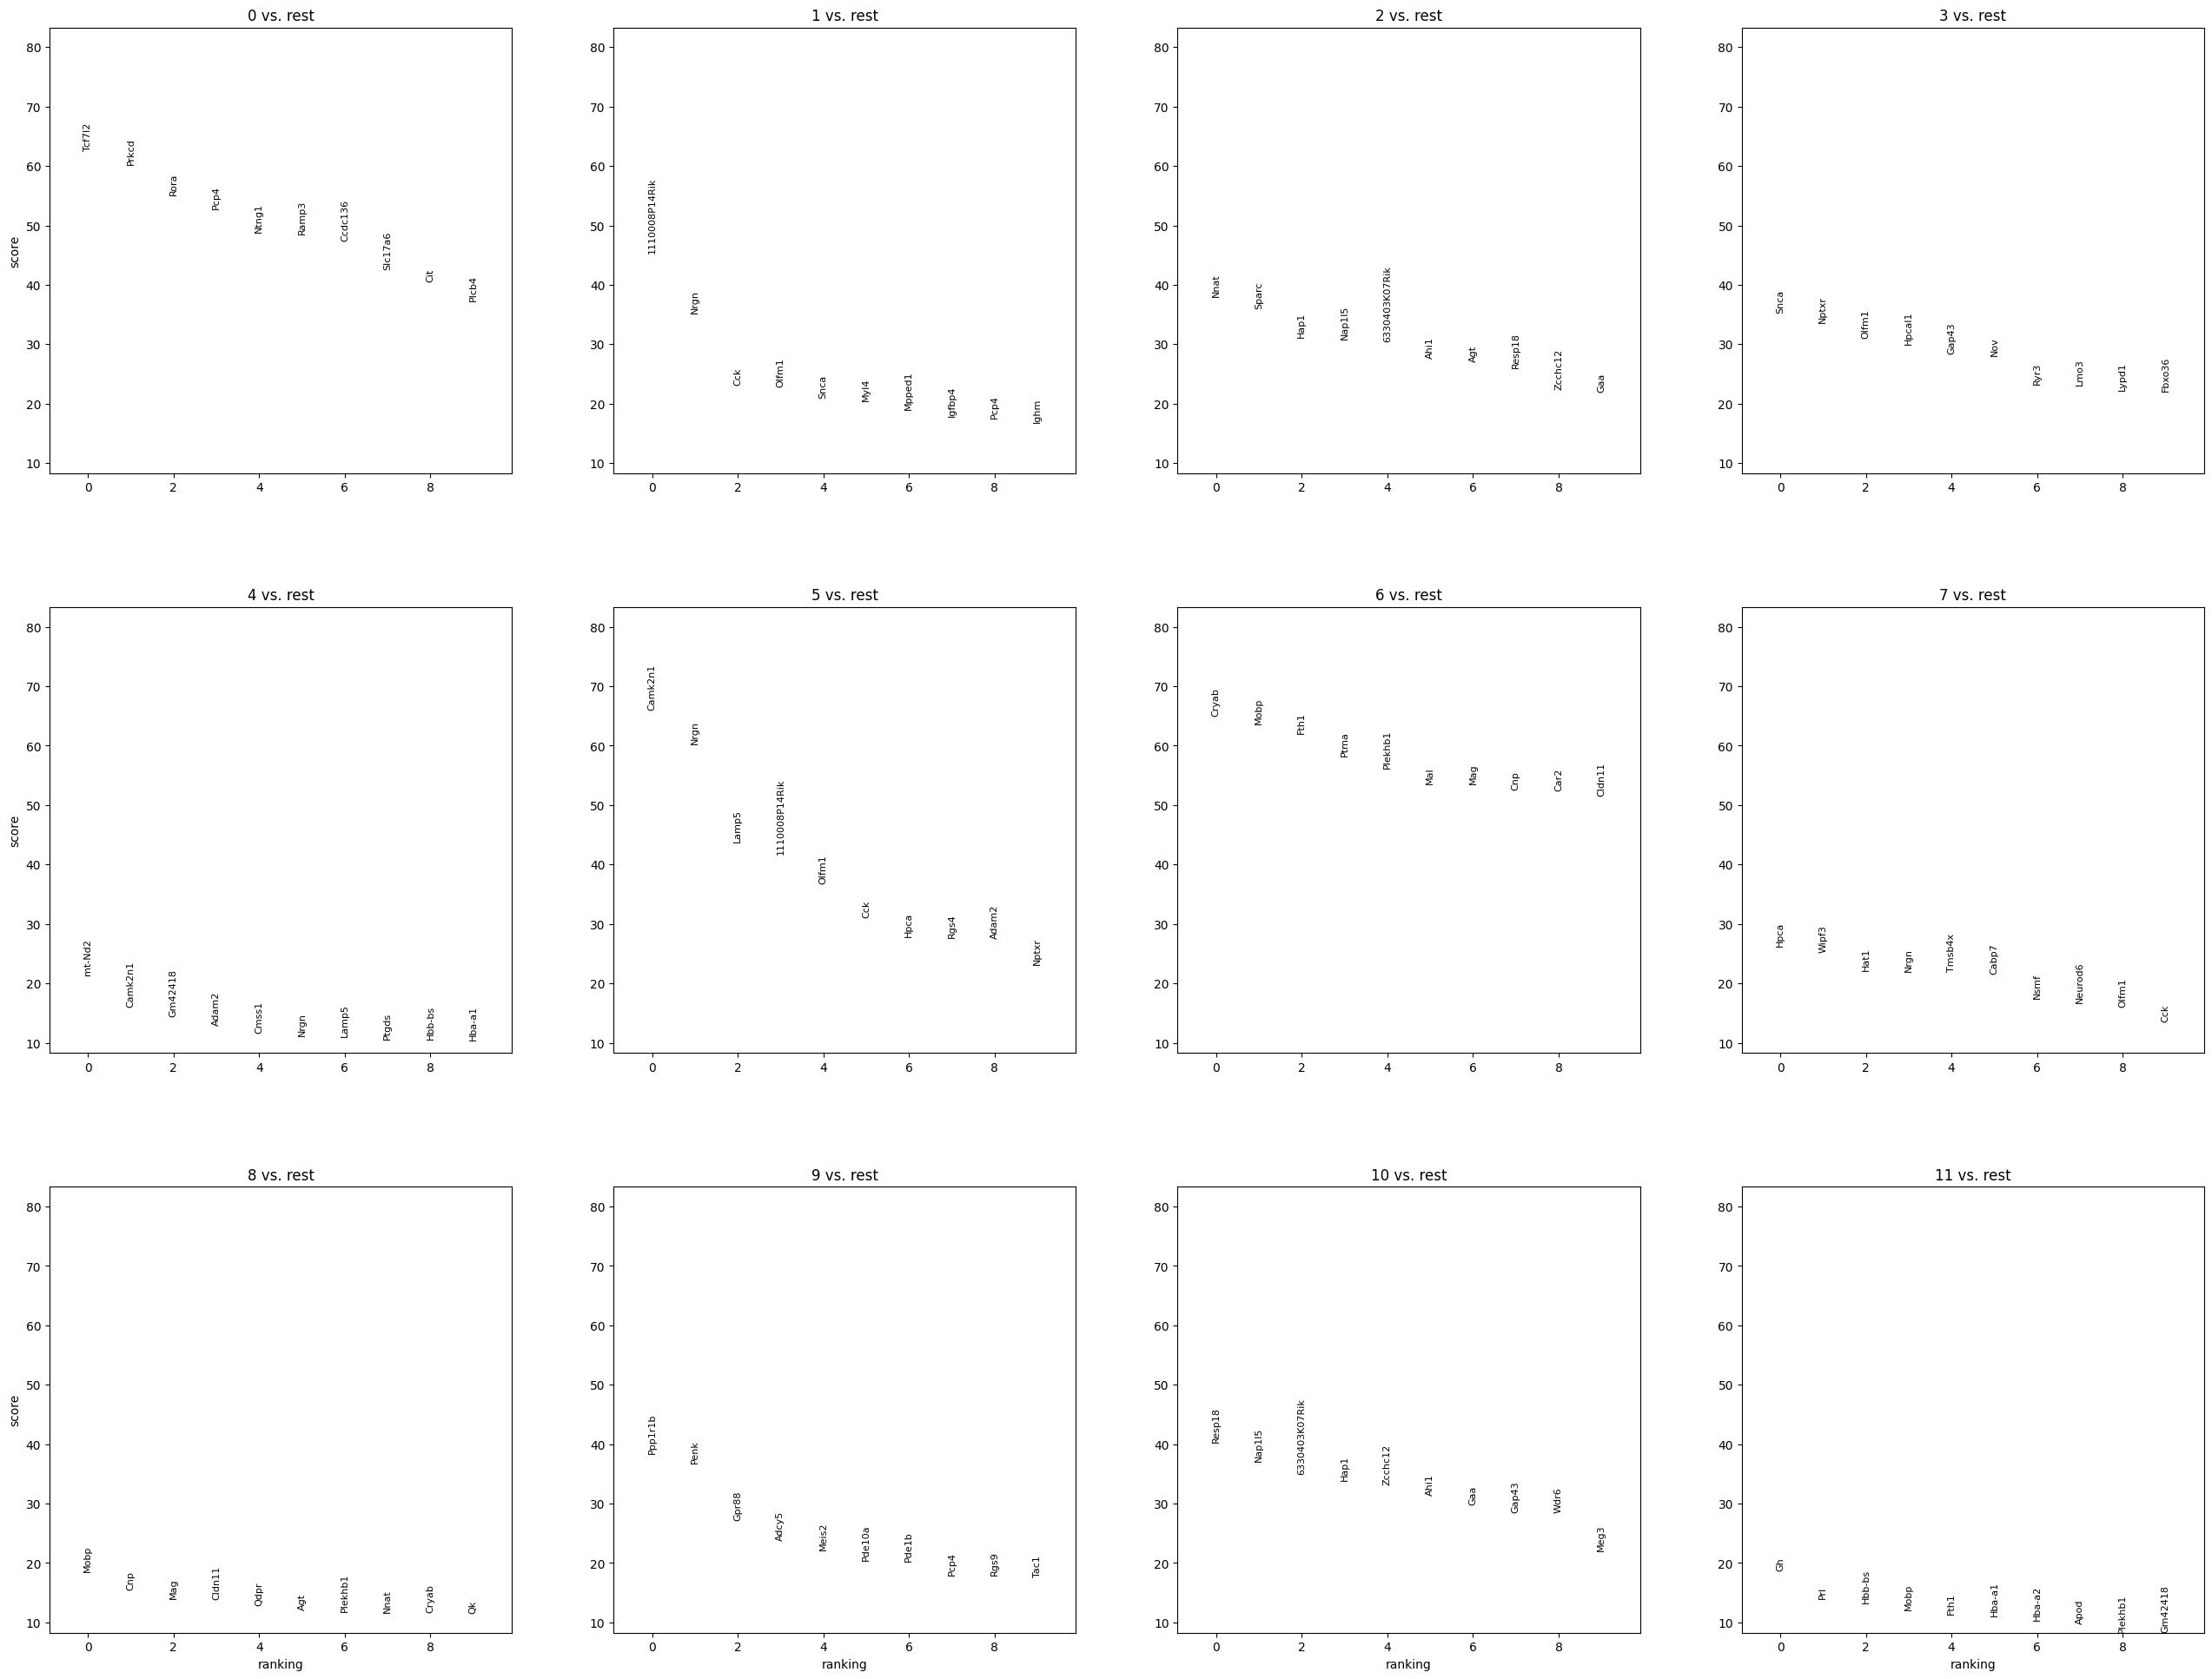

In [252]:
sc.tl.rank_genes_groups(adata, 'clusters', method='t-test') ## Group by clusters and perform differential gene expression analysis using t-test

sc.pl.rank_genes_groups(adata,n_genes=10)  ### lets plt the rank

categories: 0, 1, 2, etc.
var_group_labels: 6


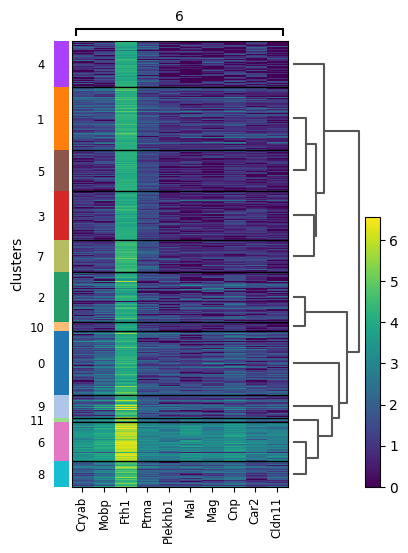

In [253]:
sc.pl.rank_genes_groups_heatmap(adata, groups='6',n_genes=10, groupby='clusters')

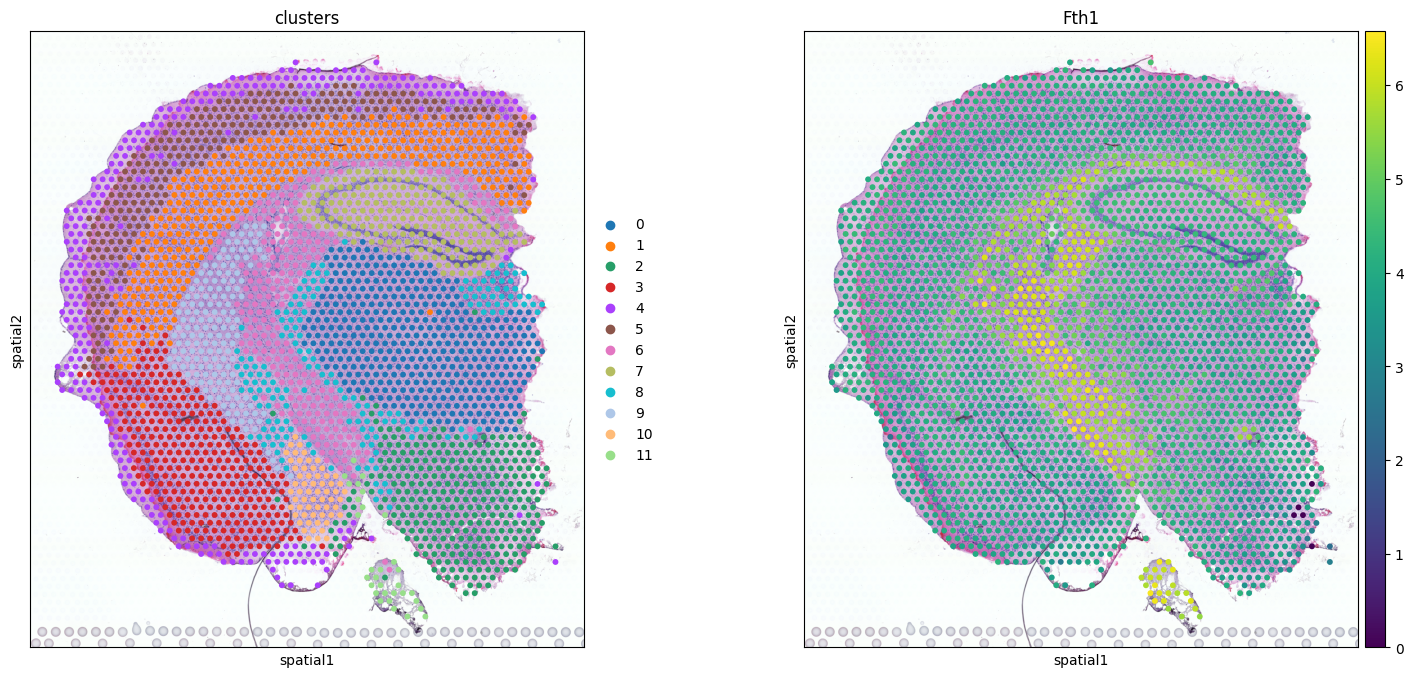

In [259]:
## Gene fth1 seem to exhibit gene expression pattern that reflects the spatial organization or structure of tissue

plt.rcParams['figure.figsize']=(8,8)
sc.pl.spatial(adata, img_key='hires', color=['clusters','Fth1'])

In [257]:
print('Available genes:', adata.var_names)
print('Available annotations:', adata.obs.columns)


Available genes: Index(['Xkr4', 'Sox17', 'St18', '1700034P13Rik', 'Arfgef1', 'Prex2', 'Gdap1',
       'Pi15', 'Tfap2b', '4930486I03Rik',
       ...
       'Rpl13a-ps1', 'Tcf7l2', 'Gm17197', 'Tdrd1', 'Afap1l2', 'Shtn1',
       'Slc18a2', 'Gm7102', 'mt-Nd2', 'Tmlhe'],
      dtype='object', length=2000)
Available annotations: Index(['in_tissue', 'array_row', 'array_col', 'n_genes_by_counts',
       'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts',
       'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes',
       'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes',
       'clusters'],
      dtype='object')
